In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

1.Read in the data from data/cars.csv and call it "df". This is a slightly smaller, cleaned dataset from this original dataset:

https://archive.ics.uci.edu/ml/datasets/automobile

In [3]:
# insert 1
df = pd.read_csv(
    'data/cars.csv',
    index_col=0
)
df.head()

,make,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,alfa-romero,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,audi,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,audi,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               195 non-null    object 
 1   wheel-base         195 non-null    float64
 2   length             195 non-null    float64
 3   width              195 non-null    float64
 4   height             195 non-null    float64
 5   curb-weight        195 non-null    int64  
 6   engine-size        195 non-null    int64  
 7   bore               195 non-null    float64
 8   stroke             195 non-null    float64
 9   compression-ratio  195 non-null    float64
 10  horsepower         195 non-null    float64
 11  peak-rpm           195 non-null    float64
 12  city-mpg           195 non-null    int64  
 13  highway-mpg        195 non-null    int64  
 14  price              195 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 24.4+ KB


2.Create a frequency chart for "make" in descending order of frequency. Hint: use value_counts.

In [5]:
# insert 2
df['make'].value_counts()

toyota           32
nissan           18
honda            13
mazda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: make, dtype: int64

3.Drop the "make" column from the dataframe, replacing it with one-hot columns corresponding to each make. This updated dataframe should be called "new_df" and it should contain 35 columns.

In [6]:
# insert 3
pt = pd.get_dummies(df['make'])
# new_df = new_df.join(pt)
df = df.join(pt)
df = df.drop(['make'], axis=1)
new_df = df
new_df

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,...,mitsubishi,nissan,peugot,plymouth,porsche,saab,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,...,0,0,0,0,0,0,0,0,0,1
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,...,0,0,0,0,0,0,0,0,0,1


4.Let's do something wrong and see what happens. Let X correspond to all of the input data in new_df (including price) and let y correspond to the target variable (price). Run a linear regression on the entire dataset and print both R^2 and the adjusted R^2. Why do you get what you get?

In [7]:
# insert 4
x = new_df
y = new_df['price']
model = LinearRegression()
model.fit(x, y)
print('R-squared', model.score(x,y))

R-squared 1.0


5.In the cell below, correct your mistake above in order and run a linear regression again. Print both R^2 and the adjusted R^2.

In [8]:
# insert 5
columns = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg','alfa-romero', 'audi', 'bmw',
       'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda',
       'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot',
       'plymouth', 'porsche', 'saab', 'subaru', 'toyota', 'volkswagen',
       'volvo']
x = new_df[columns]
y = new_df['price']
model = LinearRegression()
model.fit(x, y)
print('R-squared', model.score(x,y))

R-squared 0.9437780881065052


6.Sort the correlations of each variable with respect to price in decending order to view which variables are most and least influential. Are there any surprises?

In [9]:
# insert 6
df.corr()['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.888942
curb-weight          0.835729
horsepower           0.811027
width                0.754273
length               0.695331
wheel-base           0.585793
bore                 0.546873
mercedes-benz        0.525064
jaguar               0.332145
bmw                  0.331289
porsche              0.326910
volvo                0.146514
height               0.138291
audi                 0.102243
stroke               0.093746
compression-ratio    0.069500
peugot               0.068190
saab                 0.043799
alfa-romero          0.035005
mercury              0.029082
isuzu               -0.054873
volkswagen          -0.101036
peak-rpm            -0.104333
mazda               -0.110537
nissan              -0.112402
chevrolet           -0.112639
plymouth            -0.126900
mitsubishi          -0.133312
dodge               -0.147071
subaru              -0.149992
honda               -0.168403
toyota              -0.185389
city-mpg  

7.Read the "Filter Method" section of the article located here:
    
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
    
Use it to create a list of columns called "relevant_features" that contains only the variables whose correlations with price had an absolute value greater than 0.1. 

In [10]:
# insert 7
plt.figure(figsize=(30,30),dpi=300)
cor = new_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
cor = new_df.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features

wheel-base       0.585793
length           0.695331
width            0.754273
height           0.138291
curb-weight      0.835729
engine-size      0.888942
bore             0.546873
horsepower       0.811027
peak-rpm         0.104333
city-mpg         0.702685
highway-mpg      0.715590
price            1.000000
audi             0.102243
bmw              0.331289
chevrolet        0.112639
dodge            0.147071
honda            0.168403
jaguar           0.332145
mazda            0.110537
mercedes-benz    0.525064
mitsubishi       0.133312
nissan           0.112402
plymouth         0.126900
porsche          0.326910
subaru           0.149992
toyota           0.185389
volkswagen       0.101036
volvo            0.146514
Name: price, dtype: float64

8.Run a linear regression again but now only with input corresponding to the relevant features. 

Hint: "X = new_df[relevant_features.index]" is a line that may be helpful.

How does your adjusted R^2 here compare to the adjusted R^2 obtained you obtained above by using all columns except for price as your input?

In [11]:
# insert 8
x = new_df[relevant_features.index]
x = x.drop(columns='price')
x

,wheel-base,length,width,height,curb-weight,engine-size,bore,horsepower,peak-rpm,city-mpg,...,mazda,mercedes-benz,mitsubishi,nissan,plymouth,porsche,subaru,toyota,volkswagen,volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,111.0,5000.0,21,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,111.0,5000.0,21,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,154.0,5000.0,19,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,102.0,5500.0,24,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,115.0,5500.0,18,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,114.0,5400.0,23,...,0,0,0,0,0,0,0,0,0,1
201,109.1,188.8,68.8,55.5,3049,141,3.78,160.0,5300.0,19,...,0,0,0,0,0,0,0,0,0,1
202,109.1,188.8,68.9,55.5,3012,173,3.58,134.0,5500.0,18,...,0,0,0,0,0,0,0,0,0,1
203,109.1,188.8,68.9,55.5,3217,145,3.01,106.0,4800.0,26,...,0,0,0,0,0,0,0,0,0,1


9.For the sake of simplicity, reduce our dataset even further to contain only columns whose correlations with price are greater than 0.7 and print the head of the dataset:

In [12]:
# insert 9
cor = new_df.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
x = new_df[relevant_features.index]
x = x.drop(columns='price')
x

,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
0,64.1,2548,130,111.0,21,27
1,64.1,2548,130,111.0,21,27
2,65.5,2823,152,154.0,19,26
3,66.2,2337,109,102.0,24,30
4,66.4,2824,136,115.0,18,22
...,...,...,...,...,...,...
200,68.9,2952,141,114.0,23,28
201,68.8,3049,141,160.0,19,25
202,68.9,3012,173,134.0,18,23
203,68.9,3217,145,106.0,26,27


10.Run a linear regression model using this reduced input:

In [13]:
# insert 10
x = x
y = new_df['price']
model.fit(x, y)
print(f"R^2: {model.score(x,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)}")

R^2: 0.8280070807095942
Adjusted R^2: 0.8225179449875599


11.Write the equation of the linear regression model. You can do this in markdown or using hashtags.

In [14]:
# insert 11
# print out intercept
print(model.intercept_)

# print out other coefficients
print(model.coef_)

-54600.13476509783
[626.26930849   2.40772293  94.93655879  50.4563703  -98.82243303
 180.7692751 ]


$\hat{y} = -54600.13 + 626.27x_1 + 2.41 x_2 + 94.94 x_3 + 50.45 x_4 -98.82x_5 + 180.76x_6$

12.The stats on a school bus are width = 102 inches, curb-weight = 30000 pounds, engine-size = 550, horsepower = 250, city-mpg = 4, highway-mpg = 6. Use model.predict to predict the price of the school bus. Why might you have reservations in using this model to do this?

In [15]:
# insert 12
# width = model.coef_[0]
# curb = model.coef_[1]
# engine = model.coef_[2]
# horsepower = model.coef_[3]
# city = model.coef_[4]
# high = model.coef_[5]
pred = model.predict([[102,30000,550,250,4,6]])[0]
print(f"preditions: {pred:.2f}")

preditions: 147029.55


/opt/anaconda3/envs/pyc/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


13.Do a sns pair-wise plot of the 6 predictor variables and price.

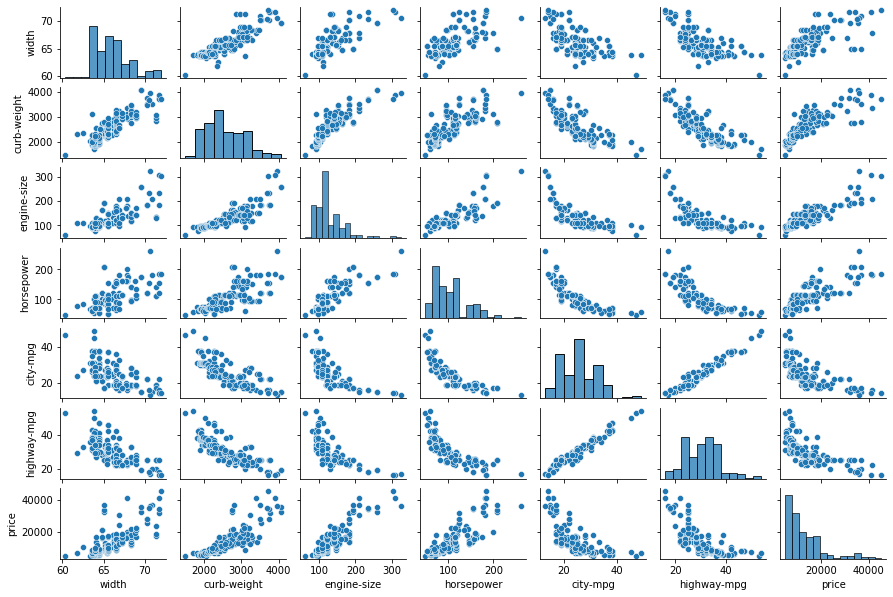

In [16]:
# insert 13
cor = new_df.corr()
cor_target = abs(cor["price"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.7]
new_df = new_df[relevant_features.index]
sns.pairplot(new_df, height = 1.2, aspect=1.5)

14.We have been sweeping something under the rug...the histograms should appear somewhat normally distributed if we want to use linear regression. The price, engine-size, and horse-power histograms look especially skewed. Create a new dataframe that contains **seven** variables: the original width, curb-weight, city-mpg, and highway-mpg, and the logs of the price, engine-size, and horsepower columns.

Hint: X['log_price'] = np.log(X['price']) is a quick way to make a new column.

In [25]:
# insert 14
df = pd.read_csv(
    'data/cars.csv',
    index_col=0
)
df.head()
x['log_price'] = np.log(df['price'])
x

,width,curb-weight,engine-size,horsepower,city-mpg,highway-mpg,log_price
0,64.1,2548,130,111.0,21,27,9.510075
1,64.1,2548,130,111.0,21,27,9.711116
2,65.5,2823,152,154.0,19,26,9.711116
3,66.2,2337,109,102.0,24,30,9.543235
4,66.4,2824,136,115.0,18,22,9.767095
...,...,...,...,...,...,...,...
200,68.9,2952,141,114.0,23,28,9.731809
201,68.8,3049,141,160.0,19,25,9.854560
202,68.9,3012,173,134.0,18,23,9.975110
203,68.9,3217,145,106.0,26,27,10.019936


15.Create a new sns-pairplot of this data to verify that the histograms look a bit more normally distributed:

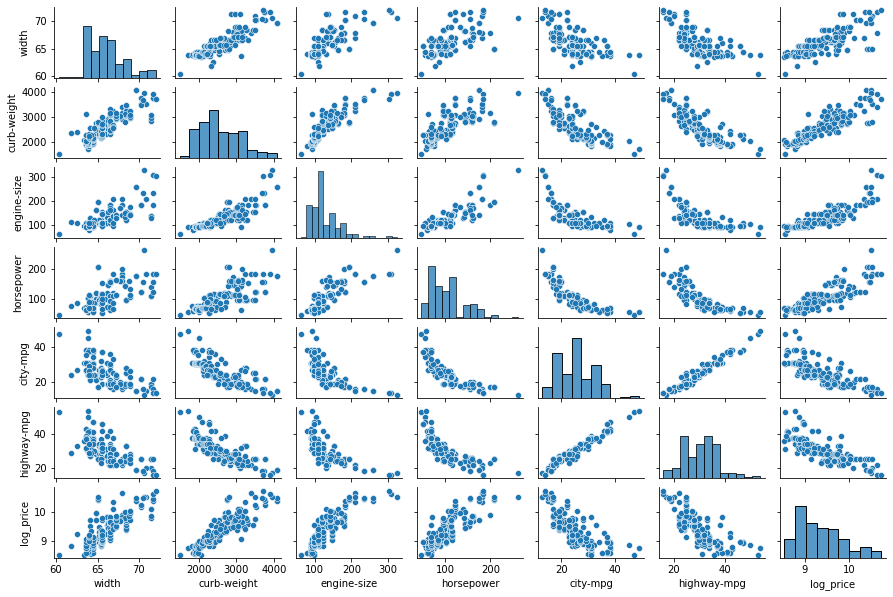

In [26]:
# insert 15
sns.pairplot(x, height = 1.2, aspect=1.5)

16.Run a linear regression on this transformed dataset, using log_price as your target variable, Did your R^2 improve by transforming the data?

In [34]:
# insert 16
y = x['log_price']
x = x.drop(columns='log_price')
x=x
model.fit(x, y)
print(f"R^2: {model.score(x,y)}")
print(f"Adjusted R^2: {1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1)}")

R^2: 0.8692097009727441
Adjusted R^2: 0.8650355424931508


### The R^2 and R improves